# Chapter 6 - Probability

### Import Packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import enum, random
import math
from collections import Counter

In [3]:
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
        
print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / older_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.5007089325501317


### Continuous Distribution

In [4]:
# Density Function

#Probability density function
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [5]:
# cumulative distribution function

def uniform_cdf(x: float) -> float:
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

### Normal Distribution

In [7]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

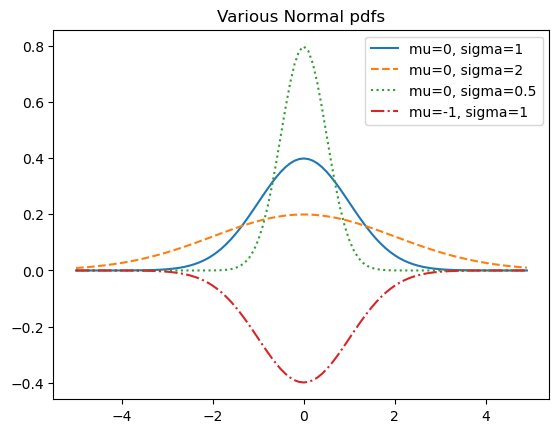

In [8]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma = 0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, sigma = -1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [10]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

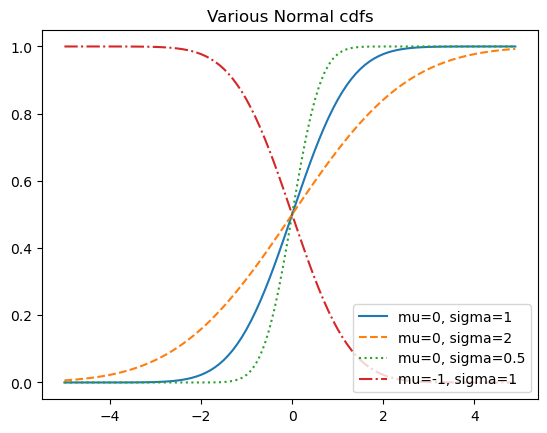

In [12]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma = 1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma = 2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma = 0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, sigma = -1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [14]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    if mu != 0 or sigma !=1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
            
            return mid

In [15]:
def bernoulli_trial(p: float) -> int:
    return 1 if random.random() < p else 0

In [16]:
def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

In [22]:
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p)for _ in range(num_points)]
    
    histogram = Counts(data)
    plt.bar([x - 0.4 for x in Histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

In [24]:
# make_hist(0.75, 100, 10000)